## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [12]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

from google.colab import files
data_to_load = files.upload()

Saving champignons.csv to champignons.csv


### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [16]:
my_dataframe = pd.read_csv('champignons.csv', dtype={'id_Champignons': int})
my_dataframe

,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,lisse,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
1,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
2,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
3,toxique,écaillée,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
4,comestible,lisse,non,libre,large,effilé,lisse,blanc,blanc,évasé,abondante
...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8120,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,brun,pendant,variée
8121,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8122,toxique,écaillée,non,libre,étroit,effilé,lisse,blanc,blanc,évasé,variée


In [19]:
len(my_dataframe) - len(my_dataframe.dropna())

0

1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [25]:
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int)
encoder.fit(my_dataframe)
columns_encode = encoder.get_feature_names_out()
valeurs_encode = encoder.transform(my_dataframe)
valeurs_encode.shape, columns_encode

((8124, 42),
 array(['toxicite_comestible', 'toxicite_toxique',
        'surface-chapeau_fibreuse', 'surface-chapeau_lisse',
        'surface-chapeau_rainurée', 'surface-chapeau_écaillée',
        'ecchymoses_non', 'ecchymoses_oui', 'attache-lamelles_adhérent',
        'attache-lamelles_libre', 'taille-lamelles_large',
        'taille-lamelles_étroit', 'forme-pied_effilé',
        'forme-pied_élargissant', 'surface-pied-sur-anneau_fibreuse',
        'surface-pied-sur-anneau_lisse', 'surface-pied-sur-anneau_soyeuse',
        'surface-pied-sur-anneau_écaillée',
        'couleur-pied-sur-anneau_beige', 'couleur-pied-sur-anneau_blanc',
        'couleur-pied-sur-anneau_brun', 'couleur-pied-sur-anneau_cannelle',
        'couleur-pied-sur-anneau_gris', 'couleur-pied-sur-anneau_jaune',
        'couleur-pied-sur-anneau_orange', 'couleur-pied-sur-anneau_rose',
        'couleur-pied-sur-anneau_rouge', 'couleur-voile_blanc',
        'couleur-voile_brun', 'couleur-voile_jaune',
        'couleur-voi

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [27]:
df = pd.DataFrame(valeurs_encode, columns=columns_encode)
df

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8120,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8121,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [31]:
features = df.iloc[:, 2:]
labels = df['toxicite_toxique']
features, labels

(      surface-chapeau_fibreuse  surface-chapeau_lisse  \
 0                            0                      1   
 1                            0                      1   
 2                            0                      1   
 3                            0                      0   
 4                            0                      1   
 ...                        ...                    ...   
 8119                         0                      1   
 8120                         0                      1   
 8121                         0                      1   
 8122                         0                      0   
 8123                         0                      1   
 
       surface-chapeau_rainurée  surface-chapeau_écaillée  ecchymoses_non  \
 0                            0                         0               0   
 1                            0                         0               0   
 2                            0                         0              

In [30]:
df

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8120,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8121,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


## 2. Arbre de décision


2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

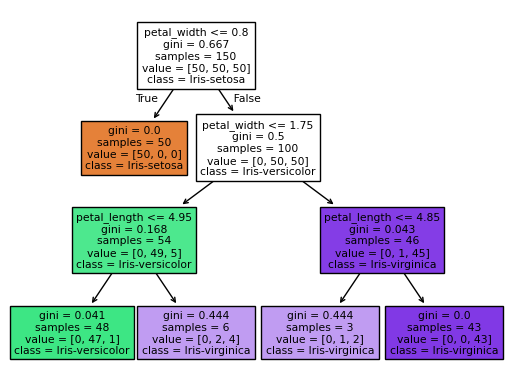

In [38]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

iris= load_iris()
#Déclaration de l'arbre de décision
clf = DecisionTreeClassifier(max_depth=3)
#Entrainement de l'abre de décision
clf.fit(iris.data, iris.target)
#Affichage de l'abre de décision obtenu après entraînement
plot_tree(clf, feature_names= ['sepal_length','sepal_width','petal_length','petal_width'], class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],filled=True)
plt.show()

2.2 Afficher l'arbre obtenu en utilisant graphwiz

2.3 Mesurer la précision du modèle sur les données de dev

## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

3.2 Afficher trois arbres au hasard.

In [ ]:
from random import randint


3.3 Mesurer la précision du modèle Random Forest sur les données de dev

## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [ ]:
from sklearn.model_selection import GridSearchCV


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

## 5. Stacking

Essayer différents modèles d'estimateur final

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?